<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Полиномиальные модели

### Цель работы

На практике познакомиться с моделями полиномиальной регрессии и классификации, понять влияние степени полинома на вычислительную сложность и точность модели.

###Содержание работы

- Загрузите учебный набор данных для регрессии "gen_regression".
- Постройте модель парной линейной регрессии, оцените ее эффективность, изобразите модель на графике.
- Постройте модель полиномиальной регрессии второго порядка. Сравните ее эффективность с первой моделью.
- Загрузите набор данных для классификации "gen_classification".
- Постройте линейную классификацию, изобразите ее на графике и оцените точность.
- Введите в данные признаки третьего порядка и постройте классификацию. Сравните с предыдущей моделью.
- Загрузите набор данных, содержащий данные о продаже домов в округе King county, США.
- Постройте на этом датасете линейную модель и полиномиальную второго порядка. Изобразите на графике и сравните эффективность.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Парная регрессия

In [ ]:
data = pd.read_csv("gen_regression.csv")

In [ ]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [ ]:

X = data.x
y = data.y
X = pd.DataFrame(X)

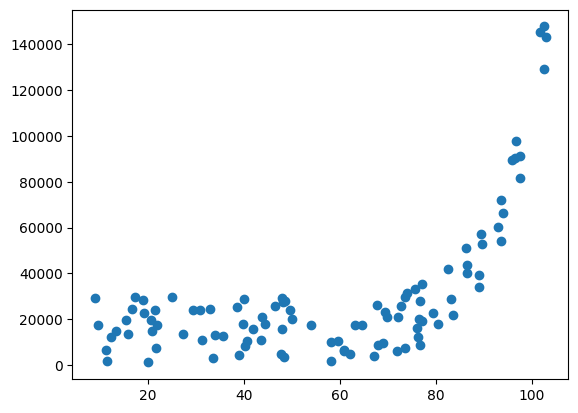

In [ ]:
plt.scatter(X, y)

### Линейная

In [ ]:
import time
from sklearn.linear_model import LinearRegression

start = time.time()
linear = LinearRegression().fit(X, y)
end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

Время обучения модели: 0.0029 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


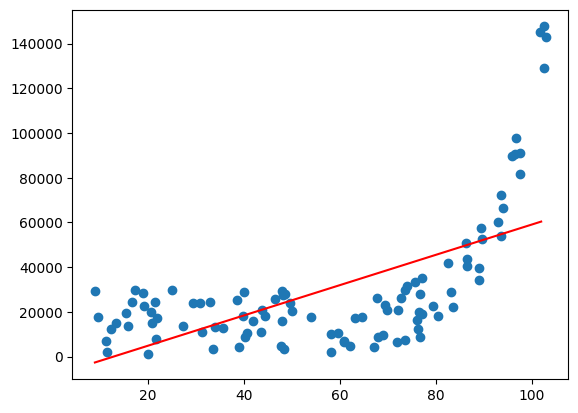

In [ ]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [ ]:
linear.score(X, y)

0.37467360318911636

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Степень полинома - 2

In [ ]:
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)

In [ ]:
X_2.shape
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

Время обучения модели: 0.0010 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.7359753787024842

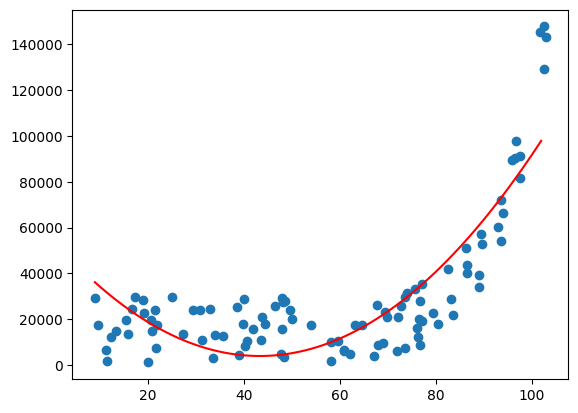

In [ ]:
start = time.time()

poly_2d = LinearRegression().fit(X_2, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

poly_2d.score(X_2, y)

### Степень полинома - 5

In [ ]:
transformation = PolynomialFeatures(degree=5)
transformation.fit(X)
X_5 = transformation.transform(X)

In [ ]:
X_5.shape
X_5[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03, 9.01366562e+05,
        8.70700093e+07, 8.41076964e+09],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03, 1.10611992e+05,
        5.30969551e+06, 2.54880741e+08],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03, 1.10176114e+05,
        5.28181602e+06, 2.53208970e+08],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03, 1.09277231e+05,
        5.22443797e+06, 2.49775290e+08],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03, 3.39840828e+05,
        2.37155975e+07, 1.65497938e+09]])

Время обучения модели: 0.0011 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.9217478060447012

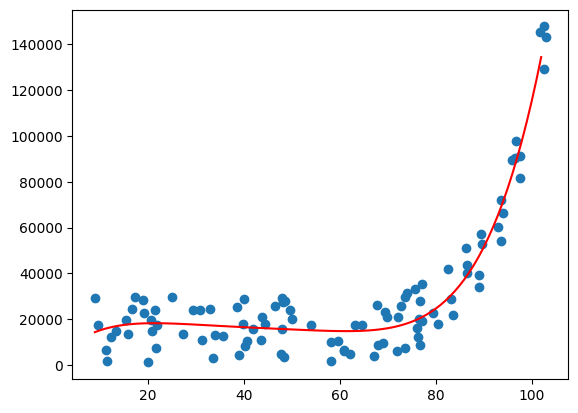

In [ ]:
start = time.time()

poly_5d = LinearRegression().fit(X_5, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

xx_5d = transformation.transform(pd.DataFrame(xx))
yy_5d = poly_5d.predict(xx_5d)
plt.scatter(X.x, y)
plt.plot(xx, yy_5d, c='r')

poly_5d.score(X_5, y)

### Степень полинома - 10

In [ ]:
transformation = PolynomialFeatures(degree=10)
transformation.fit(X)
X_10 = transformation.transform(X)

In [ ]:
X_10.shape
X_10[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03, 9.01366562e+05,
        8.70700093e+07, 8.41076964e+09, 8.12461679e+11, 7.84819949e+13,
        7.58118651e+15, 7.32325791e+17, 7.07410459e+19],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03, 1.10611992e+05,
        5.30969551e+06, 2.54880741e+08, 1.22350127e+10, 5.87315995e+11,
        2.81928664e+13, 1.35333912e+15, 6.49641920e+16],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03, 1.10176114e+05,
        5.28181602e+06, 2.53208970e+08, 1.21387762e+10, 5.81929966e+11,
        2.78975804e+13, 1.33740319e+15, 6.41147824e+16],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03, 1.09277231e+05,
        5.22443797e+06, 2.49775290e+08, 1.19415133e+10, 5.70912117e+11,
        2.72947521e+13, 1.30493551e+15, 6.23876955e+16],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03, 3.39840828e+05,
        2.37155975e+07, 1.65497938e+09, 1.15491788e+11, 8.05952827e+12,
        5.62429563e+14, 3.92488248e+16, 2.73895676e+

Время обучения модели: 0.0016 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.9222468251462039

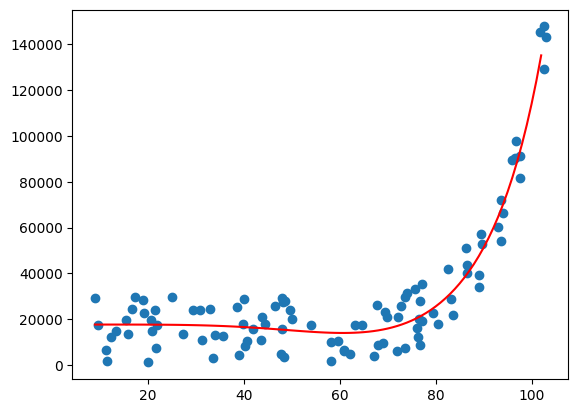

In [ ]:
start = time.time()

poly_10d = LinearRegression().fit(X_10, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

xx_10d = transformation.transform(pd.DataFrame(xx))
yy_10d = poly_10d.predict(xx_10d)
plt.scatter(X.x, y)
plt.plot(xx, yy_10d, c='r')

poly_10d.score(X_10, y)

### Степень полинома - 100

In [ ]:
transformation = PolynomialFeatures(degree=100)
transformation.fit(X)
X_100 = transformation.transform(X)

In [ ]:
X_100.shape
X_100[:5]

array([[1.00000000e+000, 9.65977805e+001, 9.33113119e+003,
        9.01366562e+005, 8.70700093e+007, 8.41076964e+009,
        8.12461679e+011, 7.84819949e+013, 7.58118651e+015,
        7.32325791e+017, 7.07410459e+019, 6.83342802e+021,
        6.60093980e+023, 6.37636134e+025, 6.15942353e+027,
        5.94986641e+029, 5.74743890e+031, 5.55189841e+033,
        5.36301063e+035, 5.18054924e+037, 5.00429558e+039,
        4.83403846e+041, 4.66957386e+043, 4.51070470e+045,
        4.35724063e+047, 4.20899773e+049, 4.06579839e+051,
        3.92747100e+053, 3.79384982e+055, 3.66477472e+057,
        3.54009103e+059, 3.41964937e+061, 3.30330539e+063,
        3.19091969e+065, 3.08235759e+067, 2.97748902e+069,
        2.87618831e+071, 2.77833407e+073, 2.68380904e+075,
        2.59249997e+077, 2.50429743e+079, 2.41909573e+081,
        2.33679278e+083, 2.25728996e+085, 2.18049200e+087,
        2.10630688e+089, 2.03464569e+091, 1.96542258e+093,
        1.89855459e+095, 1.83396159e+097, 1.77156619e+09

Время обучения модели: 0.0027 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.7924620004530059

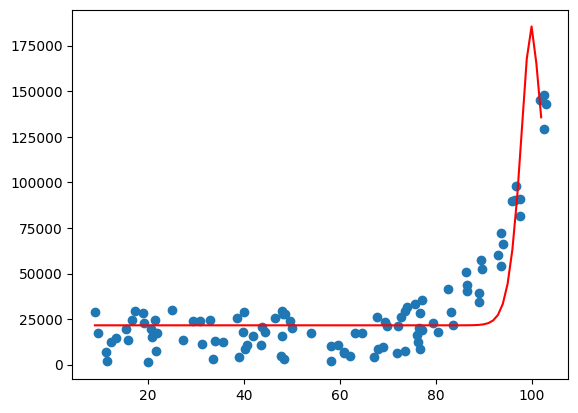

In [ ]:
start = time.time()

poly_100d = LinearRegression().fit(X_100, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

xx_100d = transformation.transform(pd.DataFrame(xx))
yy_100d = poly_100d.predict(xx_100d)
plt.scatter(X.x, y)
plt.plot(xx, yy_100d, c='r')

poly_100d.score(X_100, y)

# Применение полиномиальных моделей для задач классификации

In [ ]:
data = pd.read_csv("gen_classification.csv",
                   index_col=0)

In [ ]:
y = data.y
X = data.drop(["y"], axis=1)

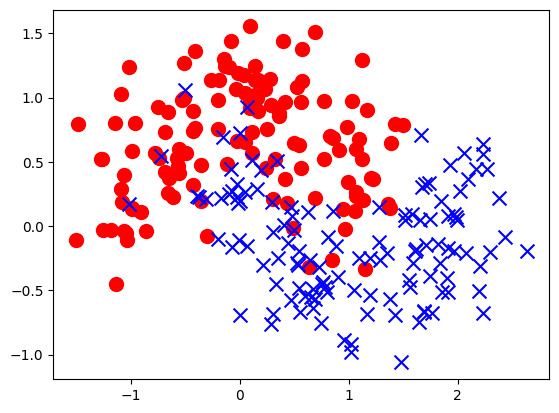

In [ ]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

### Линейная

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
start = time.time()

logistic = LogisticRegression().fit(X, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

Время обучения модели: 0.0064 секунд


<ipython-input-77-bc09005cf8c9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-77-bc09005cf8c9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


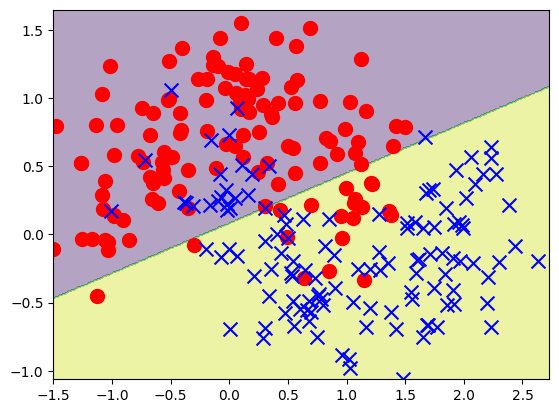

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
logistic.score(X, y)

0.832

### Полиномы

In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
X_3.shape

(250, 9)

Время обучения модели: 0.0043 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


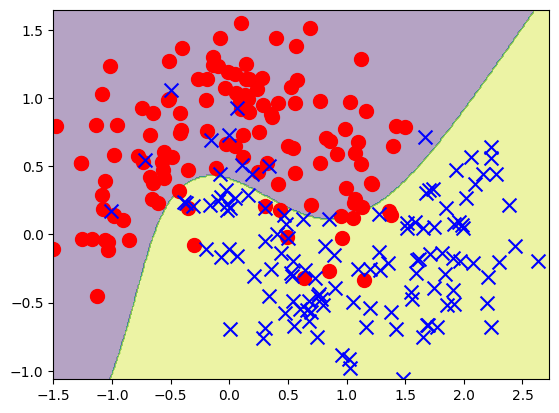

In [ ]:
start = time.time()

class_3 = LogisticRegression().fit(X_3, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_3.score(X_3, y)

0.9

### Степень полинома - 5

In [ ]:
class_transform = PolynomialFeatures(degree=5, include_bias=False)
X_5 = class_transform.fit_transform(X)
X_5.shape

(250, 20)

Время обучения модели: 0.0048 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


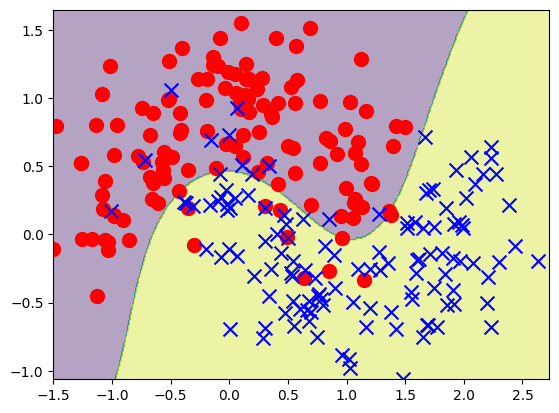

In [ ]:
start = time.time()

class_5 = LogisticRegression().fit(X_5, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

Z = class_5.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_5.score(X_5, y)

0.916

### Степень полинома - 10

In [ ]:
class_transform = PolynomialFeatures(degree=10, include_bias=False)
X_10 = class_transform.fit_transform(X)
X_10.shape

(250, 65)

Время обучения модели: 0.0096 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


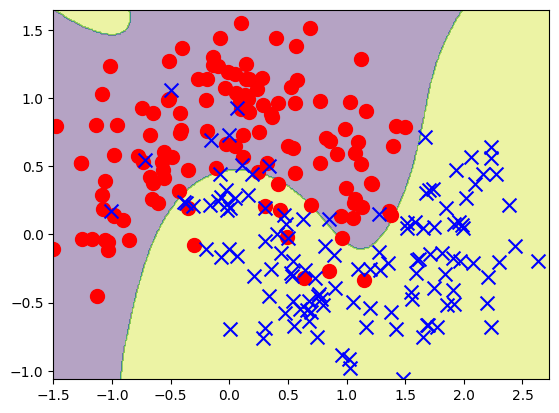

In [ ]:
start = time.time()

class_10 = LogisticRegression().fit(X_10, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

Z = class_10.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_10.score(X_10, y)

0.924

### Степень полинома - 100

In [ ]:
class_transform = PolynomialFeatures(degree=100, include_bias=False)
X_100 = class_transform.fit_transform(X)
X_100.shape

(250, 5150)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Время обучения модели: 0.0774 секунд


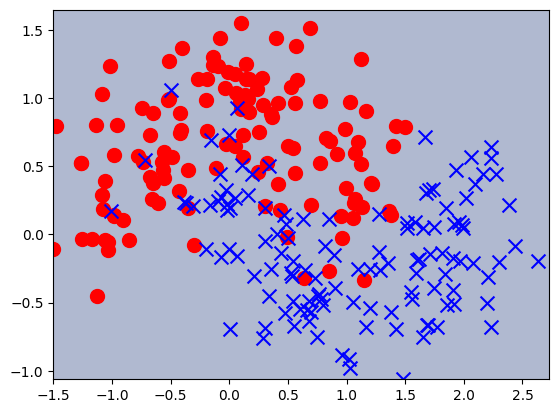

In [ ]:
start = time.time()

class_100 = LogisticRegression(max_iter=10000).fit(X_100, y)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

Z = class_100.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_100.score(X_100, y)

0.5

# Применение полиномиальные модели для более сложной и более приближенной к реальной задаче (на реальных данных)

In [ ]:
data_kc_prices = pd.read_csv("kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [ ]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [ ]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

### Линейная

Время обучения модели: 0.0159 секунд


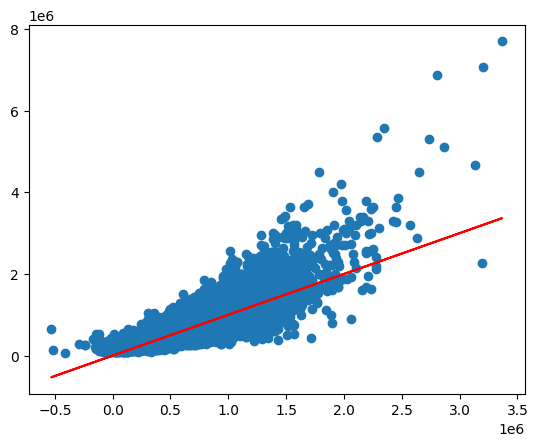

In [ ]:
start = time.time()

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")

y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

### Коэффициенты

In [ ]:
coefficients = reg_kc_multiple.coef_


feature_names = X_kc_prices.columns

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coefficients_df)

          Feature    Coefficient
14            lat  602748.226449
5      waterfront  582960.458423
8           grade   95890.445151
6            view   52870.942384
1       bathrooms   41144.278532
7       condition   26385.649139
4          floors    6689.550115
2     sqft_living     110.442865
9      sqft_above      70.785224
10  sqft_basement      39.657640
16  sqft_living15      21.681400
12   yr_renovated      19.812584
3        sqft_lot       0.128598
17     sqft_lot15      -0.382642
13        zipcode    -582.419866
11       yr_built   -2620.223211
0        bedrooms  -35766.541444
15           long -214729.828253


### Степень полинома - 3

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
X_3_kc_prices.shape

(21613, 1330)

Время обучения модели: 4.6147 секунд


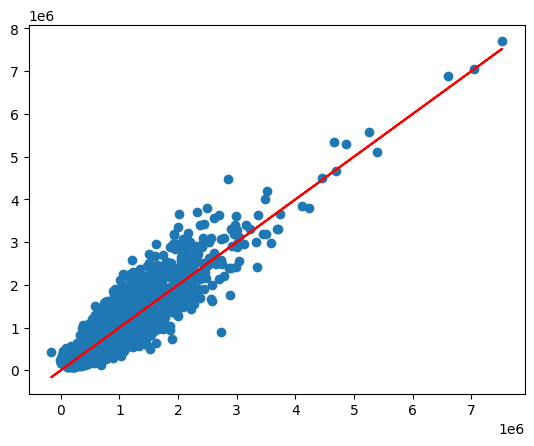

In [ ]:
start = time.time()

reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)

end = time.time()
print(f"Время обучения модели: {end - start:.4f} секунд")
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

### Коэффициенты

In [ ]:
# Коэффициенты модели
coefficients_poly = reg_poly2_kc.coef_

# Названия признаков, включая полиномиальные признаки
# Для этого нужно создать новые имена для полиномиальных признаков
# Пример: для degree=3 будут признаки x1, x2, x3, x1^2, x1*x2, x2^2, и так далее
poly_feature_names = poly_features_kc_prices.get_feature_names_out(input_features=X_kc_prices.columns)

# Создание DataFrame для удобного отображения коэффициентов
coefficients_poly_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': coefficients_poly
}).sort_values(by='Coefficient', ascending=False)

# Вывод коэффициентов полиномиальной модели
print(coefficients_poly_df)

                             Feature  Coefficient
1261           yr_built zipcode long     0.042422
526                sqft_living^2 lat     0.028320
1182           sqft_above yr_built^2     0.024386
622           sqft_living yr_built^2     0.024255
610       sqft_living sqft_above lat     0.023470
...                              ...          ...
1260            yr_built zipcode lat    -0.031115
645   sqft_living long sqft_living15    -0.035315
1171               sqft_above^2 long    -0.038658
611      sqft_living sqft_above long    -0.046691
527               sqft_living^2 long    -0.057462

[1330 rows x 2 columns]


### Степень полинома - 5

In [ ]:
# X_5_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=5)).fit_transform(X_kc_prices)
# X_5_kc_prices.shape

In [ ]:
# start = time.time()

# reg_poly5_kc = LinearRegression().fit(X_5_kc_prices, y_kc_prices)

# end = time.time()
# print(f"Время обучения модели: {end - start:.4f} секунд")
# reg_poly5_kc.score(X_5_kc_prices, y_kc_prices)

# y_pred_kc_prices = reg_poly5_kc.predict(X_5_kc_prices)
# plt.scatter(y_pred_kc_prices, y_kc_prices)
# plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

### Степень полинома - 10

### Степень полинома - 100

## Задания для самостоятельного выполнения

1. В выполненной работе добавьте замер времени обучения каждой модели.
2. На датасете "gen_regression" постройте модель пятого,

*   Новый пункт
*   Новый пункт

десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.
3. То же самое проделайте с датасетом для классификации и "King county".
4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.
5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.
6. Попробуйте также проинтерпретировать полиномиальную модель.